# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na √°rea de Marketing em entender as necessidades e demandas dos clientes de maneira f√°cil e r√°pida nas redes sociais. A solu√ß√£o proposta para esse problema foi o desenvolvimento de uma Intelig√™ncia Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solu√ß√£o √© rastrear os dados em tempo real, analisar e interpretar as mensagens e coment√°rios enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto est√° utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informa√ß√µes dispostas nesse dataset, realizaremos insights a cerca dos coment√°rios feitos nos posts do Instagram do pr√≥prio banco. Vale lembrar que os dados est√£o anonimizados e resguardados para manter a privacidade e √©tica com os usu√°rios e com o banco.

# 1. Instala√ß√£o / Setup

Para o in√≠cio do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma c√©lula de conex√£o com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisar√° do dataset baixado.

In [91]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aqui n√≥s fazemos as importa√ß√µes para tratamento dos dados, pr√©-processamento dos dados e modelamento do Bag of Words. 

In [92]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
!pip install -U emoji
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached emoji-2.4.0-py2.py3-none-any.whl
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
enelvo 0.15 requires emoji==2.2.0, but you have emoji 2.4.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
!pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached emoji-2.2.0-py3-none-any.whl
  Attempting uninstall: emoji
    Found existing installation: emoji 2.4.0
    Uninstalling emoji-2.4.0:
      Successfully uninstalled emoji-2.4.0


In [95]:
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-06-06 18:43:49.327549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.0/13.0 MB 22.5 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [96]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import unidecode
from enelvo.normaliser import Normaliser

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

import nltk

nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import emoji
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Entendimento e Tratamento dos Dados

No tratamento de dados, n√≥s analisamos o que podemos mudar no dataframe para fazer uma an√°lise melhor de seus dados e alcan√ßar o objetivo tra√ßado. Dessa forma, √© poss√≠vel visualizar algumas etapas do tratamento abaixo, por exemplo:
- Renomear as colunas para retirar aspas duplos;
- Analisar as colunas com objetos que possam ser quantitativos;
- Remover algumas colunas que n√£o servir√£o para o desenvolvimento do projeto;
- Filtro para analisar coment√°rios que n√£o tenham o 'btgpactual' como autor, para ter uma an√°lise somente dos usu√°rios.

Rodando o dataset, para analisar seu conte√∫do:

In [98]:
data = pd.read_csv('/content/drive/MyDrive/MoÃÅdulo 6/projeto/base_nova_csv.csv')
data.head(5)

id        "dataPublicada"        "autor"  \
0   1  "2022-03-04 09:38:00"     v8_capital   
1   2  "2022-03-04 09:29:00"  winthegame_of   
2   3  "2022-03-04 09:20:00"     marta_bego   
3   4  "2022-03-04 08:36:00"     lmviapiana   
4   5  "2022-03-03 21:10:00"   vanilson_dos   

                                             "texto" "sentimento"  \
0  Confira os resultados dos nossos fundos no m√™s...      NEUTRAL   
1  A Alvarez & Marsal estar√° conosco no Sportainm...      NEUTRAL   
2  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...      NEUTRAL   
3                               Minuto touro de ouro     POSITIVE   
4                                   @ricktolledo Sim      NEUTRAL   

  "tipoInteracao"  "anomalia"  "probabilidadeAnomalia"  \
0        marca√ß√£o           1                       52   
1        marca√ß√£o           0                       43   
2        marca√ß√£o           0                       45   
3      coment√°rio           0                       38   
4        resposta           0                       17   

                                          "linkPost"  "processado"  \
0           https://www.instagram.com/p/CarqO6drRux/             0   
1           https://www.instagram.com/p/CarpQUluh7z/             0   
2           https://www.instagram.com/p/CaroK9Nu8tC/             0   
3  https://www.instagram.com/p/CapXhB5Lvas/#17977...             0   
4  https://www.instagram.com/p/CapXhB5Lvas/#17842...             0   

   "contemHyperlink"  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [99]:
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })

In [100]:
data

id          dataPublicada             autor  \
0            1  "2022-03-04 09:38:00"        v8_capital   
1            2  "2022-03-04 09:29:00"     winthegame_of   
2            3  "2022-03-04 09:20:00"        marta_bego   
3            4  "2022-03-04 08:36:00"        lmviapiana   
4            5  "2022-03-03 21:10:00"      vanilson_dos   
...        ...                    ...               ...   
12350  3044013  "2022-11-30 11:51:00"       onixcapital   
12351  3044212  "2022-11-30 12:25:00"  amgcapitalinvest   
12352  3044213  "2022-11-30 12:18:00"     jayipacderota   
12353  3044412  "2022-11-30 12:50:00"   moinho_cultural   
12354  3045012  "2022-11-30 14:27:00"         bfmarilia   

                                                   texto sentimento  \
0      Confira os resultados dos nossos fundos no m√™s...    NEUTRAL   
1      A Alvarez & Marsal estar√° conosco no Sportainm...    NEUTRAL   
2      #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...    NEUTRAL   
3                                   Minuto touro de ouro   POSITIVE   
4                                       @ricktolledo Sim    NEUTRAL   
...                                                  ...        ...   
12350  Uma noite de encontros e muito conhecimento on...    NEUTRAL   
12351  Erros financeiros para eliminar antes dos 30 a...    NEUTRAL   
12352  Estou muito grato por todo o esfor√ßo que voc√™ ...   POSITIVE   
12353  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...    NEUTRAL   
12354  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

      tipoInteracao  anomalia  probabilidadeAnomalia  \
0          marca√ß√£o         1                     52   
1          marca√ß√£o         0                     43   
2          marca√ß√£o         0                     45   
3        coment√°rio         0                     38   
4          resposta         0                     17   
...             ...       ...                    ...   
12350      marca√ß√£o         1                     54   
12351      marca√ß√£o         0                     39   
12352    coment√°rio         1                     52   
12353      marca√ß√£o         0                     43   
12354    coment√°rio         0                     28   

                                                linkPost  processado  \
0               https://www.instagram.com/p/CarqO6drRux/           0   
1               https://www.instagram.com/p/CarpQUluh7z/           0   
2               https://www.instagram.com/p/CaroK9Nu8tC/           0   
3      https://www.instagram.com/p/CapXhB5Lvas/#17977...           0   
4      https://www.instagram.com/p/CapXhB5Lvas/#17842...           0   
...                                                  ...         ...   
12350        https://www.instagram.com/reel/CllsqI7goSC/           0   
12351           https://www.instagram.com/p/Cllw0CmNGkX/           0   
12352  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
12353        https://www.instagram.com/reel/ClluX-cAoaf/           0   
12354  https://www.instagram.com/p/CllkSBOuKlJ/#17975...           0   

       contemHyperlink  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
12350                0  
12351                0  
12352                0  
12353                0  
12354                0  

[12355 rows x 11 columns]

In [101]:
data.columns

Index(['id', 'dataPublicada', 'autor', 'texto', 'sentimento', 'tipoInteracao',
       'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado',
       'contemHyperlink'],
      dtype='object')

In [102]:
data.dtypes

id                        int64
dataPublicada            object
autor                    object
texto                    object
sentimento               object
tipoInteracao            object
anomalia                  int64
probabilidadeAnomalia     int64
linkPost                 object
processado                int64
contemHyperlink           int64
dtype: object

In [103]:
data = data[data['anomalia'] != 1]
data

id          dataPublicada             autor  \
1            2  "2022-03-04 09:29:00"     winthegame_of   
2            3  "2022-03-04 09:20:00"        marta_bego   
3            4  "2022-03-04 08:36:00"        lmviapiana   
4            5  "2022-03-03 21:10:00"      vanilson_dos   
5            6  "2022-03-03 20:54:00"       ricktolledo   
...        ...                    ...               ...   
12346  3043812  "2022-11-30 11:27:00"    eduardocolares   
12349  3044012  "2022-11-30 12:00:00"         danielucm   
12351  3044212  "2022-11-30 12:25:00"  amgcapitalinvest   
12353  3044412  "2022-11-30 12:50:00"   moinho_cultural   
12354  3045012  "2022-11-30 14:27:00"         bfmarilia   

                                                   texto sentimento  \
1      A Alvarez & Marsal estar√° conosco no Sportainm...    NEUTRAL   
2      #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...    NEUTRAL   
3                                   Minuto touro de ouro   POSITIVE   
4                                       @ricktolledo Sim    NEUTRAL   
5      Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
...                                                  ...        ...   
12346               Atendam o telefone pelo amor de Deus   POSITIVE   
12349  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   POSITIVE   
12351  Erros financeiros para eliminar antes dos 30 a...    NEUTRAL   
12353  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...    NEUTRAL   
12354  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

      tipoInteracao  anomalia  probabilidadeAnomalia  \
1          marca√ß√£o         0                     43   
2          marca√ß√£o         0                     45   
3        coment√°rio         0                     38   
4          resposta         0                     17   
5        coment√°rio         0                     20   
...             ...       ...                    ...   
12346    coment√°rio         0                     28   
12349      marca√ß√£o         0                     44   
12351      marca√ß√£o         0                     39   
12353      marca√ß√£o         0                     43   
12354    coment√°rio         0                     28   

                                                linkPost  processado  \
1               https://www.instagram.com/p/CarpQUluh7z/           0   
2               https://www.instagram.com/p/CaroK9Nu8tC/           0   
3      https://www.instagram.com/p/CapXhB5Lvas/#17977...           0   
4      https://www.instagram.com/p/CapXhB5Lvas/#17842...           0   
5      https://www.instagram.com/p/CapXhB5Lvas/#17935...           0   
...                                                  ...         ...   
12346  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
12349           https://www.instagram.com/p/Cllt7_nOTBc/           0   
12351           https://www.instagram.com/p/Cllw0CmNGkX/           0   
12353        https://www.instagram.com/reel/ClluX-cAoaf/           0   
12354  https://www.instagram.com/p/CllkSBOuKlJ/#17975...           0   

       contemHyperlink  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
...                ...  
12346                0  
12349                0  
12351                0  
12353                0  
12354                0  

[9608 rows x 11 columns]

- Droppando algumas colunas, pois elas n√£o ser√£o necess√°rias para a nossa an√°lise e desenvolvimento da IA

In [104]:
data_dropado = data.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
data_dropado

autor                                              texto  \
1         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
2            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
3            lmviapiana                               Minuto touro de ouro   
4          vanilson_dos                                   @ricktolledo Sim   
5           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
...                 ...                                                ...   
12346    eduardocolares               Atendam o telefone pelo amor de Deus   
12349         danielucm  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   
12351  amgcapitalinvest  Erros financeiros para eliminar antes dos 30 a...   
12353   moinho_cultural  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...   
12354         bfmarilia  @btgpactual pq o morning call n√£o est√° mais ap...   

      sentimento tipoInteracao  
1        NEUTRAL      marca√ß√£o  
2        NEUTRAL      marca√ß√£o  
3       POSITIVE    coment√°rio  
4        NEUTRAL      resposta  
5       POSITIVE    coment√°rio  
...          ...           ...  
12346   POSITIVE    coment√°rio  
12349   POSITIVE      marca√ß√£o  
12351    NEUTRAL      marca√ß√£o  
12353    NEUTRAL      marca√ß√£o  
12354   NEGATIVE    coment√°rio  

[9608 rows x 4 columns]

- Retirando todas as mensagens relacionadas ao 'btgpactual', pois n√£o queremos fazer a an√°lise de conte√∫do que √© feito por eles mesmos (que √© o nosso cliente), mas sim dos usu√°rios que d√£o um feedback.

In [105]:
data_limpo = data_dropado.loc[data_dropado['autor'] != 'btgpactual']
data_limpo

autor                                              texto  \
1         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
2            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
3            lmviapiana                               Minuto touro de ouro   
4          vanilson_dos                                   @ricktolledo Sim   
5           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
...                 ...                                                ...   
12346    eduardocolares               Atendam o telefone pelo amor de Deus   
12349         danielucm  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   
12351  amgcapitalinvest  Erros financeiros para eliminar antes dos 30 a...   
12353   moinho_cultural  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...   
12354         bfmarilia  @btgpactual pq o morning call n√£o est√° mais ap...   

      sentimento tipoInteracao  
1        NEUTRAL      marca√ß√£o  
2        NEUTRAL      marca√ß√£o  
3       POSITIVE    coment√°rio  
4        NEUTRAL      resposta  
5       POSITIVE    coment√°rio  
...          ...           ...  
12346   POSITIVE    coment√°rio  
12349   POSITIVE      marca√ß√£o  
12351    NEUTRAL      marca√ß√£o  
12353    NEUTRAL      marca√ß√£o  
12354   NEGATIVE    coment√°rio  

[9487 rows x 4 columns]

- Confirma√ß√£o de n√£o nulos dentro do dataset

In [106]:
df = data_limpo.dropna()
df

autor                                              texto  \
1         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
2            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
3            lmviapiana                               Minuto touro de ouro   
4          vanilson_dos                                   @ricktolledo Sim   
5           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
...                 ...                                                ...   
12346    eduardocolares               Atendam o telefone pelo amor de Deus   
12349         danielucm  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   
12351  amgcapitalinvest  Erros financeiros para eliminar antes dos 30 a...   
12353   moinho_cultural  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...   
12354         bfmarilia  @btgpactual pq o morning call n√£o est√° mais ap...   

      sentimento tipoInteracao  
1        NEUTRAL      marca√ß√£o  
2        NEUTRAL      marca√ß√£o  
3       POSITIVE    coment√°rio  
4        NEUTRAL      resposta  
5       POSITIVE    coment√°rio  
...          ...           ...  
12346   POSITIVE    coment√°rio  
12349   POSITIVE      marca√ß√£o  
12351    NEUTRAL      marca√ß√£o  
12353    NEUTRAL      marca√ß√£o  
12354   NEGATIVE    coment√°rio  

[9487 rows x 4 columns]

## 2.1 Visualiza√ß√£o dos dados

### Autores que mais comentam

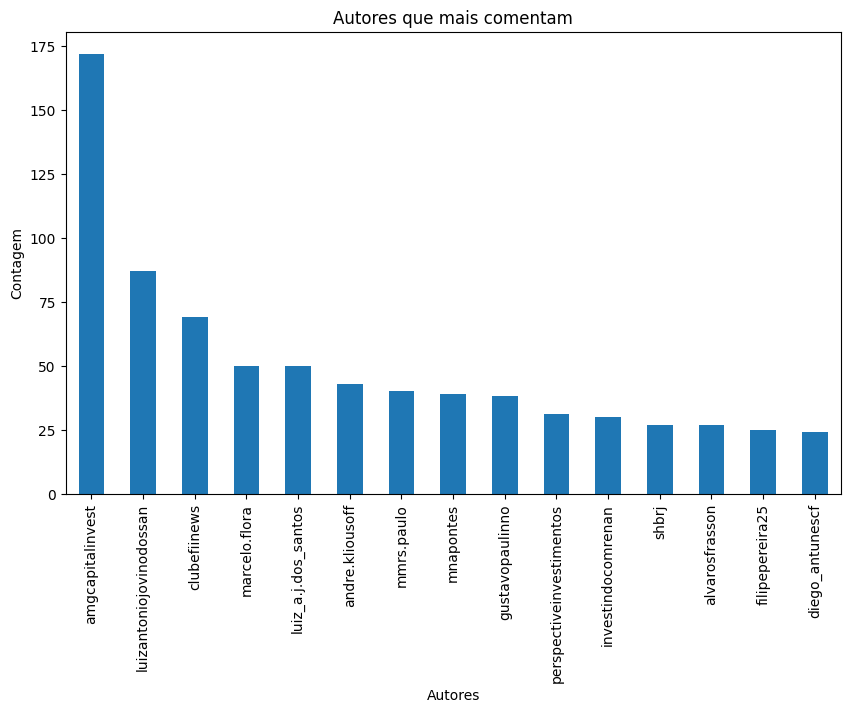

In [107]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gr√°fico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

### Os tipos de intera√ß√µes mais frequentes

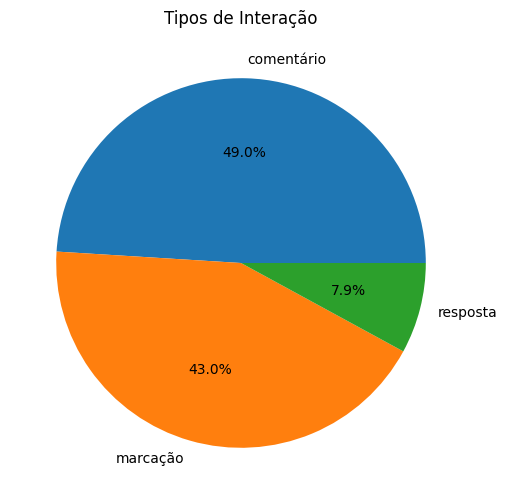

In [108]:
# Contar os tipos de intera√ß√£o
count_interactions = df['tipoInteracao'].value_counts()
# Criar o gr√°fico de pizza
plt.figure(figsize=(8, 6))
count_interactions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Intera√ß√£o')
plt.ylabel('')
plt.show()

### Tipos de sentimentos mais frequentes

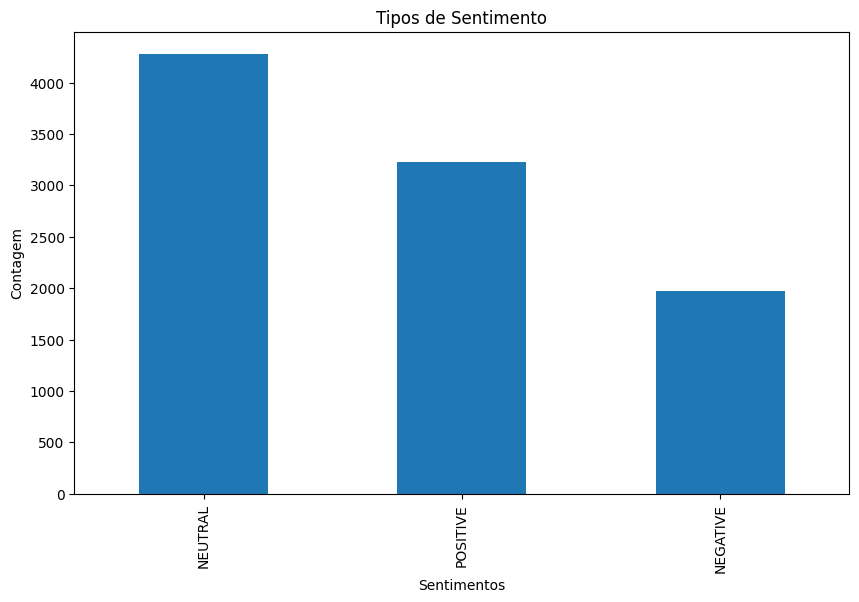

In [109]:
# Contar os tipos de sentimentos
count_sentimentos = df['sentimento'].value_counts()

# Plotagem do gr√°fico de barras
plt.figure(figsize=(10, 6))
count_sentimentos.plot(kind='bar')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

### Frequ√™ncia dos sentimentos por tipo de Intera√ß√£o

<Figure size 1000x600 with 0 Axes>

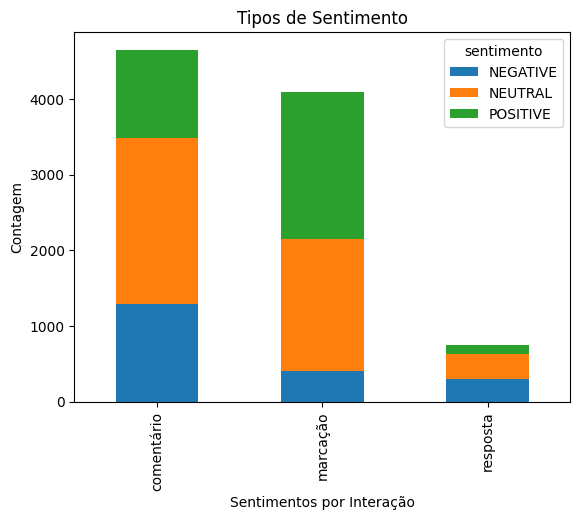

In [110]:
# Contar os tipos de sentimentos por Intera√ß√£o
contagem = df.groupby(['tipoInteracao', 'sentimento']).size().unstack(fill_value=0)

# Plotagem do gr√°fico de barras
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', stacked=True)
plt.xlabel('Sentimentos por Intera√ß√£o')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

# 3. Testes isolados



Nesta se√ß√£o, come√ßamos a fazer testes isolados para demonstrar como √© o funcionamento de alguns dos pr√©-processos que iremos utilizar no dataframe principal. O objetivo √© dar um exemplo para visualizar como iremos utilizar antes de ser aplicado em outras fun√ß√µes. Os pr√©-processos s√£o:
- Tokeniza√ß√£o
- Tratamento de emojis
- Remo√ß√£o de Alfanum√©ricos
- Tratamento de abrevia√ß√µes
- Remo√ß√£o de Stopwords
- Lematiza√ß√£o

#### 3.1 Tokeniza√ß√£o

Aqui estamos pegando a frase e separando ela em suas diversas palavras e componentes.

In [111]:
text = "@btgpacutal https://linkd.in/AQwasd Pessoal, vcs sabiam que esse √© o melhor banco da Am√©rica Latina?!üòç #teste123"

tk = TweetTokenizer()
words = tk.tokenize(text)  

words

['@btgpacutal',
 'https://linkd.in/AQwasd',
 'Pessoal',
 ',',
 'vcs',
 'sabiam',
 'que',
 'esse',
 '√©',
 'o',
 'melhor',
 'banco',
 'da',
 'Am√©rica',
 'Latina',
 '?',
 '!',
 'üòç',
 '#teste123']

#### 3.2 Tratamento de emoji

Aqui fazemos o tratamento do emoji que foi visto na frase anterior.
√â basicamente um dicionario de emoji.
Passamos de um valor "visual" para um valor "textual"

In [112]:
emoji_dict = {
    'üòÑ': 'sorriso',
    'üòÜ': 'risos',
    'üòä': 'envergonhado',
    'üòÉ': 'sorridente',
    'üòè': 'sorriso_ir√¥nico',
    'üòç': 'olhos_cora√ß√£o',
    'üòò': 'beijo_cora√ß√£o',
    'üòö': 'beijo_olhos_fechados',
    'üò≥': 'corado',
    'üòå': 'aliviado',
    'üòâ': 'satisfeito',
    'üòÅ': 'sorris√£o',
    'üòú': 'piscadela',
    'üòú': 'l√≠ngua_fora_piscadela',
    'üòù': 'l√≠ngua_fora_olhosfechados',
    'üòÄ': 'rindo_muito',
    'üòó': 'beijo',
    'üòô': 'beijo_sorriso_olhos',
    'üòõ': 'l√≠ngua_fora',
    'üò¥': 'dormindo',
    'üòü': 'preocupado',
    'üò¶': 'franzindo_testa',
    'üòß': 'angustiado',
    'üòÆ': 'boca_aberta',
    'üò¨': 'careta',
    'üòï': 'confuso',
    'üòØ': 'silencioso',
    'üòë': 'express√£o_neutra',
    'üòí': 'desinteressado',
    'üòÖ': 'sorriso_suado',
    'üòî': 'desapontado',
    'üòï': 'confundido',
    'üò®': 'amedrontado',
    'üò∞': 'suando_frio',
    'üò£': 'perseverando',
    'üò¢': 'chorando',
    'üò≠': 'solu√ßando',
    'üòÇ': 'alegria',
    'üò≤': 'surpreso',
    'üò±': 'gritando',
    'ü§ì': 'nerd',
    'üò´': 'cansado',
    'üò†': 'raiva',
    'üò°': 'raiva_intensa',
    'üò§': 'bufada',
    'üò¥': 'dormindo',
    'üòã': 'delicioso',
    'üò∑': 'm√°scara',
    'üòé': '√≥culos_escuros',
    'üòµ': 'morte',
    'üëø': 'diabinho',
    'üòà': 'sorriso_malicioso',
    'üòê': 'cara_neutra',
    'üò∂': 'sem_boca',
    'üòá': 'inocente',
    'üíô': 'cora√ß√£o',
    '‚ú®': 'brilho',
    'üåü': 'estrela brilhante',
    'üí•': 'explos√£o',
    '‚ùó': 'exclama√ß√£o',
    '‚ùì': 'interroga√ß√£o',
    'üí§': 'zZz',
    'üî•': 'fogo',
    'üí©': 'coc√¥',
    'üëç': 'joinha',
    'üëé': 'polegar_baixo',
    'üëå': 'ok',
    'üëä': 'soquinho',
    'üëã': 'aceno',
    'üôå': 'ma√µs_ceu',
    'üôè': 'rezando',
    'üëè': 'palmas',
    'üí™': 'for√ßa',   
    'üñï': 'dedo_meio',
    'üëâ': 'apontando_direita',
    'üôà': 'vergonha',
    'üëÄ': 'olhos_revirados',
    'üíã': 'beijo',
    'üéâ': 'celebra√ß√£o',
    'üéä': 'confete',
    'üì∑': 'c√¢mera',
    'üíª': 'computador',
    'üì±': 'celular',
    'üìû': 'telefone',
    'üì£': 'anuncio',
    '‚åõ': 'tempo_acabando',
    '‚è∞': 'alarme',
    'üíµ': 'dinheiro',
    'üí∞': 'grana',
    'üí≥': 'cart√£o_de_cr√©dito',
    'üí£': 'bomba',
    'üìà': 'gr√°fico_subindo',
    'üìâ': 'gr√°fico_descendo',
    'üìÖ': 'calend√°rio',
    'üèÜ': 'trof√©u',
    'üè¶': 'banco',
    'üöÄ': 'foguete',
    'üö®': 'sirene',
    'üöî': 'pol√≠cia',
    'üîù': 'top',
    'üÜô': 'up',
    'üÜò': 'socorro',
    'üîû': 'proibido_menores_idade',
    'üö´': 'proibido',
    'üîú': 'breve',
    '‚ùå': 'erro',
    'üíØ': 'perfei√ß√£o',
    '‚úÖ': 'aprovado',
    '‚§µÔ∏è': 'seta_para_baixo_esquerda',
    '‚ö†Ô∏è' : 'aten√ß√£o',
    'ü§Ø' : 'cabe√ßa_explodindo',
    'üí∏' : 'dinheiro_voando',
    'üìç' : 'localiza√ß√£o',
}

#### 3.3 Remo√ß√£o de Alfanum√©ricos

In [113]:
output_list = []
for word in emoji_dict:
    if word.strip(): 
        palavra_sem_marcacao = re.sub((r'@\w*'), '', word)
        palavra_sem_hashtag = re.sub((r'#\w*'), '', palavra_sem_marcacao)
        palavra_sem_hyperlink = re.sub(r'https\S*', '', palavra_sem_hashtag)
        output_list.extend(re.findall(r'\w+', palavra_sem_hyperlink)) # analisar se n√£o √© melhor usar o append em vez de extend

output_list

[]

#### 3.4 Tratamento de abrevia√ß√µes

In [114]:
norm = Normaliser(tokenizer='readable')
palavras_normalizadas = []

for palavra in output_list:
  normalizacao = norm.normalise(palavra)
  palavras_normalizadas.append(normalizacao)

# Verificando se alguma palavra normalizada cont√©m '_'
palavras_tratadas = []
for palavra in palavras_normalizadas:
    if '_' in palavra:
        tratado = palavra.replace(' ', '')
        palavras_tratadas.append(tratado)
    else:
        palavras_tratadas.append(palavra)

palavras_tratadas

[]

#### 3.5 Remo√ß√£o de stopwords

Aqui n√≥s iremos remover palavras que consideramos "desnecess√°rias" para a an√°lise de sentimentos.

Iremos demonstrar uma lista de quais palavras podem ser essas.

In [115]:
stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10] # exemplo de at√© 10 palavras, mas podem ser usadas mais que isso

['a',
 '√†',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [116]:
filtered_demojized = []

for palavra in palavras_tratadas:
    if palavra not in stopwords:
        filtered_demojized.append(palavra)

filtered_demojized

[]

#### 3.6 Lematiza√ß√£o


O modelo pt_core_news_sm do SpaCy para o portugu√™s, que estamos utilizando, utiliza uma estrat√©gia de lematiza√ß√£o baseada em regras e dicion√°rio. No entanto, o modelo pode n√£o conseguir lematizar corretamente algumas palavras, especialmente quando se trata de casos irregulares.

In [117]:
nlp = spacy.load("pt_core_news_sm")

lista = []

for palavra in filtered_demojized:
  doc = nlp(palavra)
  for token in doc:
    if token.lemma_ != '-PRON-':  # Ignorar pronomes pessoais
      if token.pos_ == 'VERB':  # Verificando se √© um verbo
          lema = token.lemma_
          break
      else:
          lema = token.lemma_  # Usar o lema do token atual
  lista.append(lema)

lista

[]

# 4. Defini√ß√£o de fun√ß√µes


Aqui em defini√ß√£o de fun√ß√µes √© onde iremos criar as fun√ß√µes referentes aos tratamentos que mostramos acima! J√° que, dessa forma, poderemos chamar essas mesmas fun√ß√µes em qualquer momento para fazer o tratamento do conte√∫do textual.
- Tokeniza√ß√£o
- Tratamento de emojis
- Remo√ß√£o de Alfanum√©ricos
- Tratamento de abrevia√ß√µes
- Remo√ß√£o de Stopwords
- Lematiza√ß√£o

#### 4.1 Tokeniza√ß√£o

In [118]:
def tokenizer(comentarios):
  comentarios_tokenizados = []
  tk = TweetTokenizer()
  for comentario in comentarios:
    palavras = tk.tokenize(comentario.lower())
    comentarios_tokenizados.append(palavras)
  return comentarios_tokenizados

#### 4.2 Tratamento de emoji

In [119]:
def emoji_to_word(text):
    for emoji_code, emoji_word in emoji_dict.items():
        text = text.replace(emoji_code, emoji_word)
    return text

#### 4.3 Remo√ß√£o de Alfanum√©ricos


In [120]:
def removendo_alfanumericos(tokens):
  output_tokens = []
  for sentence in tokens:
      output_list = []
      for palavra in sentence:
          if palavra.strip(): # Verifica se a palavra n√£o √© uma string vazia
            palavra_sem_marcacao = re.sub((r'@\w*'), '', palavra)
            palavra_sem_hashtag = re.sub((r'#\w*'), '', palavra_sem_marcacao)
            palavra_sem_hyperlink = re.sub(r'https\S*', '', palavra_sem_hashtag)
            palavra_sem_www = re.sub(r'\bwww\.[^\s]*', '', palavra_sem_hyperlink)
            palavra_sem_numeros = re.sub((r'[0-9]'), '', palavra_sem_www)
            palavra_sem_btg = re.sub((r'\bbtg\b'), '', palavra_sem_numeros)
            palavra_sem_btgpactual = re.sub((r'\bpactual\b'), '', palavra_sem_btg)
            output_list.extend(re.findall(r'\w+', palavra_sem_btgpactual)) # analisar se n√£o √© melhor usar o append em vez de extend
      output_tokens.append(output_list)
  return output_tokens

#### 4.4 Tratamento de abrevia√ß√µes 


In [121]:
# Dicion√°rio de g√≠rias e abrevia√ß√µes para normaliza√ß√£o
dicionario_girias = {
    'vc': 'voc√™',
    'vcs':'voc√™',
    'Vc': 'voc√™',
    'pq': 'porque',
    'Pq': 'porque',
    'tbm': 'tamb√©m',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cad√™',
    'Gnt ': 'gente',
    'gnt ': 'gente',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'j√°',
    'naum': 'n√£o',
    'ta': 'est√°',
    'eh': '√©',
    'vdd': 'verdade',
    'vlw': 'valeu',
    'p': 'para',
    'sdds': 'saudades',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    's' : 'sim',
    'ss': 'sim',
    'Ss': 'sim',
    'pdc': 'pode crer',
    'n' : 'n√£o',
    'nn': 'n√£o',
    'Nn': 'n√£o',
    'pls': 'please',
    'obg': 'obrigado',
    'agr': 'agora'
}

In [122]:
def comentarios_normalizados(tokens, dicionario_girias):
  tokens_normalizados = []

  for sentence in tokens:
    treated = []

    for palavra in sentence:
      if palavra in dicionario_girias:
          palavra_normalizada = dicionario_girias.get(palavra, palavra)
          treated.append(palavra_normalizada)
      else:
          treated.append(palavra)

    treated = [palavra.replace(' ', '') if '_' in palavra else palavra for palavra in treated]
    tokens_normalizados.append(treated)

  return tokens_normalizados

#### 4.5 Remo√ß√£o de stopwords

##### Lista stopwords

In [123]:
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

207

In [124]:
new_stopwords = [ 'a', '√†', 'adeus', 'agora', 'a√≠', 'ainda', 'al√©m', 'algo', 'algu√©m', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'ap√≥s', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', '√°rea', 'as', '√†s', 'assim', 'at√©', 'atr√°s', 'atrav√©s', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'c√°', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'd√°', 'd√£o', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'dever√°', 'dever√£o', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'd√∫vida', 'e', '√©', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', '√©ramos', '√©s', 'essa', 'essas', 'esse', 'esses', 'esta', 'est√°', 'estamos', 'est√£o', 'estar', 'estas', 'est√°s', 'estava', 'estavam', 'est√°vamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiv√©ramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estiv√©ssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'fa√ßo', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'f√¥ramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'f√¥ssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'h√°', 'haja', 'hajam', 'hajamos', 'h√£o', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houver√°', 'houveram', 'houv√©ramos', 'houver√£o', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houver√≠amos', 'houvermos', 'houvesse', 'houvessem', 'houv√©ssemos', 'isso', 'isto', 'j√°', 'la', 'l√°', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'm√°ximo', 'me', 'meio', 'menor', 'menos', 'm√™s', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'n√£o', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ningu√©m', 'n√≠vel', 'no', 'noite', 'nome', 'nos', 'n√≥s', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'n√∫mero', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'p√¥de', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'p√µe', 'p√µem', 'pois', 'ponto', 'pontos', 'por', 'por√©m', 'porque', 'porqu√™', 'posi√ß√£o', 'poss√≠vel', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'pr√≥pria', 'pr√≥prias', 'pr√≥prio', 'pr√≥prios', 'pr√≥xima', 'pr√≥ximas', 'pr√≥ximo', 'pr√≥ximos', 'pude', 'puderam', 'quais', 'qu√°is', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'qu√™', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'quest√£o', 'quinta', 'quinto', 'quinze', 'rela√ß√£o', 'sabe', 'sabem', 's√£o', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'ser√°', 'ser√£o', 'serei', 'seremos', 'seria', 'seriam', 'ser√≠amos', 'sete', 's√©tima', 's√©timo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 's√≥', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'tamb√©m', 'tampouco', 'tanta', 'tantas', 'tanto', 't√£o', 'tarde', 'te', 'tem', 't√©m', 't√™m', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'ter√°', 'ter√£o', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'ter√≠amos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 't√≠nhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tiv√©ramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tiv√©ssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'tr√™s', 'treze', 'tu', 'tua', 'tuas', 'tudo', '√∫ltima', '√∫ltimas', '√∫ltimo', '√∫ltimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'v√£o', 'v√°rios', 'vem', 'v√™m', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'voc√™', 'voc√™s', 'vos', 'v√≥s', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]
len(new_stopwords)

560

In [125]:
sem_acentuacao_stopwords = ['de','a','o','que','e','do','da','em','um','para','e','com','uma','os','no','se','na','por','mais','as','dos','como','mas','foi','ao','ele','das','tem','a','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo','pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao','voce','tinha','foram','essa','num','nem','suas','meu','as','minha','tem','numa','pelos','elas','havia','seja','qual','sera','nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','voces','vos','lhes','meus','minhas','teu','tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas','isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera','estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos','hao','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos','houverem','houverei','houvera','houveremos','houverao','houveria','houveriamos','houveriam','sou','somos','sao','era','eramos','eram','fui','foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos','serao','seria','seriamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos','tenha','tenhamos','tenham','tivesse','tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam']
len(sem_acentuacao_stopwords)

219

In [126]:
def merge_stopwords(arr1, arr2):
    merged = arr1.copy()  # Cria uma c√≥pia do primeiro array
    for element in arr2:
        if element not in merged:
            merged.append(element)  # Adiciona apenas os elementos que n√£o est√£o presentes no primeiro array
    return merged

In [127]:
stopwords = merge_stopwords(stopwords, new_stopwords)

In [128]:
stopwords = merge_stopwords(stopwords, sem_acentuacao_stopwords)

In [129]:
stopwords.remove('n√£o')

In [130]:
len(stopwords)

588

##### Fun√ß√£o

In [131]:
def remove_stopwords(tokens):
  filtered_tokens = []
  for sentence in tokens:
      filtered = [palavra for palavra in sentence if palavra not in stopwords]
      filtered_tokens.append(filtered)
  return filtered_tokens

#### 4.6 Lematiza√ß√£o


In [132]:
def lematizacao(tokens):
  # Carregar o modelo pr√©-treinado do SpaCy para o idioma portugu√™s
  nlp = spacy.load("pt_core_news_sm")
  lemmatized_tokens = []

  for sentence in tokens:
    lemma_list = []
    doc = nlp(" ".join(sentence))  # Unir as palavras da frase em uma √∫nica string

    for token in doc:
      if token.lemma_ != '-PRON-':
        if token.pos_ == 'VERB':
          palavra_lematizada = token.lemma_
        else:
          palavra_lematizada = token.lemma_

        if palavra_lematizada:
          lemma_list.append(palavra_lematizada)

    lemmatized_tokens.append(lemma_list)
    
  # Converter todas as palavras para min√∫sculas
  lemmatized_tokens_lower = []
  for sentence in lemmatized_tokens:
    sentence_lower = [palavra.lower() for palavra in sentence]
    lemmatized_tokens_lower.append(sentence_lower)
  
  return lemmatized_tokens_lower

#### 4.7 Processamento de texto

In [133]:
# def processarTexto(texto):
#   tokens_processados = texto.map(lematizacao) 
#   return tokens_processados

# 5. Testes das fun√ß√µes

### Selecionando algumas frases para fazer testes

In [134]:
df = df.reset_index(drop=True)
df

autor                                              texto  \
0        winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
1           marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2           lmviapiana                               Minuto touro de ouro   
3         vanilson_dos                                   @ricktolledo Sim   
4          ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
...                ...                                                ...   
9482    eduardocolares               Atendam o telefone pelo amor de Deus   
9483         danielucm  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   
9484  amgcapitalinvest  Erros financeiros para eliminar antes dos 30 a...   
9485   moinho_cultural  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...   
9486         bfmarilia  @btgpactual pq o morning call n√£o est√° mais ap...   

     sentimento tipoInteracao  
0       NEUTRAL      marca√ß√£o  
1       NEUTRAL      marca√ß√£o  
2      POSITIVE    coment√°rio  
3       NEUTRAL      resposta  
4      POSITIVE    coment√°rio  
...         ...           ...  
9482   POSITIVE    coment√°rio  
9483   POSITIVE      marca√ß√£o  
9484    NEUTRAL      marca√ß√£o  
9485    NEUTRAL      marca√ß√£o  
9486   NEGATIVE    coment√°rio  

[9487 rows x 4 columns]

#### Mini-tratamento

In [135]:
df = df[df['autor'] != 'moinho_cultural']
df

autor  \
0                winthegame_of   
1                   marta_bego   
2                   lmviapiana   
3                 vanilson_dos   
4                  ricktolledo   
...                        ...   
9481  perspectiveinvestimentos   
9482            eduardocolares   
9483                 danielucm   
9484          amgcapitalinvest   
9486                 bfmarilia   

                                                  texto sentimento  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...    NEUTRAL   
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...    NEUTRAL   
2                                  Minuto touro de ouro   POSITIVE   
3                                      @ricktolledo Sim    NEUTRAL   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
...                                                 ...        ...   
9481                               Excelente explica√ß√£o   POSITIVE   
9482               Atendam o telefone pelo amor de Deus   POSITIVE   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   POSITIVE   
9484  Erros financeiros para eliminar antes dos 30 a...    NEUTRAL   
9486  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

     tipoInteracao  
0         marca√ß√£o  
1         marca√ß√£o  
2       coment√°rio  
3         resposta  
4       coment√°rio  
...            ...  
9481    coment√°rio  
9482    coment√°rio  
9483      marca√ß√£o  
9484      marca√ß√£o  
9486    coment√°rio  

[9477 rows x 4 columns]

#### Printando algumas frases

In [136]:
print(df['texto'].iloc[0])

A Alvarez & Marsal estar√° conosco no Sportainmet¬Æ Labs, primeiro evento do sportainment¬Æ da Am√©rica Latina em uma parceria entre BTG Pactual, Hubstage, Bichara e Motta Advogados e Win the Game.   Participe! Evento online e gratuito ‚Ä¢ 23 de mar√ßo Inscreva-se no link na bio üíô üòâ  . . #Hubstage #SportainmentLabs #BicharaeMotta #BTGPactual #WinTheGame #Sportainment #Esporte #Entretenimento #Digital #futuro


In [137]:
print(df['texto'].iloc[92])

Russia X Ucrania  Quais os impactos Economicos? üßê Te explico em 2 minutos ü§ì üöÄ üéØ üìäüë©üèΩ‚Äçüíª  #assessoradeinvestimentos #vidadeassessor #aai #mulheresnomercado #educacaofinanceira #investimentos  #economia #financas #cenarioeconomico #cenariomacro #mercadoemfoco #mercadofinanceiro


### 5.1 Tokeniza√ß√£o
- Para o processo de tokeniza√ß√£o, √© poss√≠vel visualizar que em qualquer caso, a fun√ß√£o consegue tokenizar todo e qualquer termo existente da frase.

In [138]:
tokenized_data = tokenizer(df['texto'])
print(tokenized_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', '?', 'üßê', 'te', 'explico', 'em', '2', 'minutos', 'ü§ì', 'üöÄ', 'üéØ', 'üìä', 'üë©üèΩ\u200düíª', '#assessoradeinvestimentos', '#vidadeassessor', '#aai', '#mulheresnomercado', '#educacaofinanceira', '#investimentos', '#economia', '#financas', '#cenarioeconomico', '#cenariomacro', '#mercadoemfoco', '#mercadofinanceiro']


### 5.2 Tratamento de emoji

In [139]:
def emoji_to_word(text):
    for emoji_code, emoji_word in emoji_dict.items():
        text = text.replace(emoji_code, emoji_word)
    return text

### 5.3 Remo√ß√£o de alfanum√©ricos


In [140]:
alfanumericos_data = removendo_alfanumericos(emoji_dict)
print(alfanumericos_data[92])

[]


### 5.4 Tratamento de abrevia√ß√µes 


In [141]:
normalizacao_data = comentarios_normalizados(alfanumericos_data, dicionario_girias)
print(normalizacao_data[92])

[]


### 5.5 Remo√ß√£o de stopwords

In [142]:
stopwords_data = remove_stopwords(normalizacao_data)
print(stopwords_data[92])

[]


### 5.6 Lematiza√ß√£o


In [143]:
lematizacao_data = lematizacao(stopwords_data)
print(lematizacao_data[92])

[]


# 6. Processamento / Demonstra√ß√µes

Nessa se√ß√£o de processamento, n√≥s aplicamos as fun√ß√µes criadas anteriormente e aplicamos elas no dataframe, como forma de demonstrar os resultados efetivos.
- tokenized = coluna tokenizada
- no_stopwords = coluna tokenizada e sem stopwords
- texto_processed = coluna tokenizada, sem stopwords e sem acentua√ß√µes
- stemmed = coluna tokenizada, sem stopwords, sem acentua√ß√µes e com o stemming aplicado

In [144]:
df

autor  \
0                winthegame_of   
1                   marta_bego   
2                   lmviapiana   
3                 vanilson_dos   
4                  ricktolledo   
...                        ...   
9481  perspectiveinvestimentos   
9482            eduardocolares   
9483                 danielucm   
9484          amgcapitalinvest   
9486                 bfmarilia   

                                                  texto sentimento  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...    NEUTRAL   
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...    NEUTRAL   
2                                  Minuto touro de ouro   POSITIVE   
3                                      @ricktolledo Sim    NEUTRAL   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
...                                                 ...        ...   
9481                               Excelente explica√ß√£o   POSITIVE   
9482               Atendam o telefone pelo amor de Deus   POSITIVE   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   POSITIVE   
9484  Erros financeiros para eliminar antes dos 30 a...    NEUTRAL   
9486  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

     tipoInteracao  
0         marca√ß√£o  
1         marca√ß√£o  
2       coment√°rio  
3         resposta  
4       coment√°rio  
...            ...  
9481    coment√°rio  
9482    coment√°rio  
9483      marca√ß√£o  
9484      marca√ß√£o  
9486    coment√°rio  

[9477 rows x 4 columns]

In [145]:
df['tokenized'] = tokenizer(df['texto'])
df.head(10)

<ipython-input-145-10d996576f5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = tokenizer(df['texto'])


autor                                              texto  \
0         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
1            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2            lmviapiana                               Minuto touro de ouro   
3          vanilson_dos                                   @ricktolledo Sim   
4           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5    donadabolsaoficial  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6          clubefiinews  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7           marciotome_  Sem alguns parceiros como a wiseaai e btgpactu...   
8  gustavonascimentoofc  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9      claudiofalavinha                                     @thaotinhasbfc   

  sentimento tipoInteracao                                          tokenized  
0    NEUTRAL      marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...  
1    NEUTRAL      marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...  
2   POSITIVE    coment√°rio                          [minuto, touro, de, ouro]  
3    NEUTRAL      resposta                                [@ricktolledo, sim]  
4   POSITIVE    coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...  
5   NEGATIVE      marca√ß√£o  [com, o, in√≠cio, da, guerra, entre, r√∫ssia, e,...  
6   NEGATIVE      marca√ß√£o  [o, fundo, imobili√°rio, hospital, nossa, senho...  
7    NEUTRAL      marca√ß√£o  [sem, alguns, parceiros, como, a, wiseaai, e, ...  
8   POSITIVE      marca√ß√£o  [h√°, 10, anos, eu, vivo, 24, horas, por, dia, ...  
9    NEUTRAL    coment√°rio                                   [@thaotinhasbfc]

In [146]:
emoji_tratado = df
emoji_tratado['texto_e_emoji'] = emoji_tratado['texto'].apply(emoji_to_word)
emoji_tratado

<ipython-input-146-e188d6460abb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_tratado['texto_e_emoji'] = emoji_tratado['texto'].apply(emoji_to_word)


autor  \
0                winthegame_of   
1                   marta_bego   
2                   lmviapiana   
3                 vanilson_dos   
4                  ricktolledo   
...                        ...   
9481  perspectiveinvestimentos   
9482            eduardocolares   
9483                 danielucm   
9484          amgcapitalinvest   
9486                 bfmarilia   

                                                  texto sentimento  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...    NEUTRAL   
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...    NEUTRAL   
2                                  Minuto touro de ouro   POSITIVE   
3                                      @ricktolledo Sim    NEUTRAL   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
...                                                 ...        ...   
9481                               Excelente explica√ß√£o   POSITIVE   
9482               Atendam o telefone pelo amor de Deus   POSITIVE   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   POSITIVE   
9484  Erros financeiros para eliminar antes dos 30 a...    NEUTRAL   
9486  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

     tipoInteracao                                          tokenized  \
0         marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...   
1         marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...   
2       coment√°rio                          [minuto, touro, de, ouro]   
3         resposta                                [@ricktolledo, sim]   
4       coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...   
...            ...                                                ...   
9481    coment√°rio                            [excelente, explica√ß√£o]   
9482    coment√°rio       [atendam, o, telefone, pelo, amor, de, deus]   
9483      marca√ß√£o  [voc√™, sabe, quais, s√£o, os, 10, maiores, fiis...   
9484      marca√ß√£o  [erros, financeiros, para, eliminar, antes, do...   
9486    coment√°rio  [@btgpactual, pq, o, morning, call, n√£o, est√°,...   

                                          texto_e_emoji  
0     A Alvarez & Marsal estar√° conosco no Sportainm...  
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...  
2                                  Minuto touro de ouro  
3                                      @ricktolledo Sim  
4     Queria saber se a Btg banking √© a pr√≥pria btg ...  
...                                                 ...  
9481                               Excelente explica√ß√£o  
9482               Atendam o telefone pelo amor de Deus  
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...  
9484  Erros financeiros para eliminar antes dos 30 a...  
9486  @btgpactual pq o morning call n√£o est√° mais ap...  

[9477 rows x 6 columns]

In [149]:
df['sem_alfanumerico'] = removendo_alfanumericos(df['texto_e_emoji'])
df.head(10)

<ipython-input-149-d79e199e7a17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sem_alfanumerico'] = removendo_alfanumericos(df['texto_e_emoji'])


autor                                              texto  \
0         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
1            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2            lmviapiana                               Minuto touro de ouro   
3          vanilson_dos                                   @ricktolledo Sim   
4           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5    donadabolsaoficial  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6          clubefiinews  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7           marciotome_  Sem alguns parceiros como a wiseaai e btgpactu...   
8  gustavonascimentoofc  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9      claudiofalavinha                                     @thaotinhasbfc   

  sentimento tipoInteracao                                          tokenized  \
0    NEUTRAL      marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...   
1    NEUTRAL      marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...   
2   POSITIVE    coment√°rio                          [minuto, touro, de, ouro]   
3    NEUTRAL      resposta                                [@ricktolledo, sim]   
4   POSITIVE    coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...   
5   NEGATIVE      marca√ß√£o  [com, o, in√≠cio, da, guerra, entre, r√∫ssia, e,...   
6   NEGATIVE      marca√ß√£o  [o, fundo, imobili√°rio, hospital, nossa, senho...   
7    NEUTRAL      marca√ß√£o  [sem, alguns, parceiros, como, a, wiseaai, e, ...   
8   POSITIVE      marca√ß√£o  [h√°, 10, anos, eu, vivo, 24, horas, por, dia, ...   
9    NEUTRAL    coment√°rio                                   [@thaotinhasbfc]   

                                       texto_e_emoji  \
0  A Alvarez & Marsal estar√° conosco no Sportainm...   
1  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2                               Minuto touro de ouro   
3                                   @ricktolledo Sim   
4  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7  Sem alguns parceiros como a wiseaai e btgpactu...   
8  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9                                     @thaotinhasbfc   

                                    sem_alfanumerico  
0  [A, A, l, v, a, r, e, z, M, a, r, s, a, l, e, ...  
1  [R, e, p, o, s, t, b, t, g, p, a, c, t, u, a, ...  
2  [M, i, n, u, t, o, t, o, u, r, o, d, e, o, u, ...  
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]  
4  [Q, u, e, r, i, a, s, a, b, e, r, s, e, a, B, ...  
5  [C, o, m, o, i, n, √≠, c, i, o, d, a, g, u, e, ...  
6  [O, F, u, n, d, o, I, m, o, b, i, l, i, √°, r, ...  
7  [S, e, m, a, l, g, u, n, s, p, a, r, c, e, i, ...  
8  [H, √°, a, n, o, s, e, u, v, i, v, o, h, o, r, ...  
9            [t, h, a, o, t, i, n, h, a, s, b, f, c]

In [151]:
df['sem_abreviacoes'] = comentarios_normalizados(df['sem_alfanumerico'],dicionario_girias) # tem que ver como passar como argumento o dicion√°rio de abrevia√ß√£o e a lista de excluir palavras
df.head(10)

<ipython-input-151-a5fd8b47daf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sem_abreviacoes'] = comentarios_normalizados(df['sem_alfanumerico'],dicionario_girias) # tem que ver como passar como argumento o dicion√°rio de abrevia√ß√£o e a lista de excluir palavras


autor                                              texto  \
0         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
1            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2            lmviapiana                               Minuto touro de ouro   
3          vanilson_dos                                   @ricktolledo Sim   
4           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5    donadabolsaoficial  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6          clubefiinews  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7           marciotome_  Sem alguns parceiros como a wiseaai e btgpactu...   
8  gustavonascimentoofc  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9      claudiofalavinha                                     @thaotinhasbfc   

  sentimento tipoInteracao                                          tokenized  \
0    NEUTRAL      marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...   
1    NEUTRAL      marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...   
2   POSITIVE    coment√°rio                          [minuto, touro, de, ouro]   
3    NEUTRAL      resposta                                [@ricktolledo, sim]   
4   POSITIVE    coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...   
5   NEGATIVE      marca√ß√£o  [com, o, in√≠cio, da, guerra, entre, r√∫ssia, e,...   
6   NEGATIVE      marca√ß√£o  [o, fundo, imobili√°rio, hospital, nossa, senho...   
7    NEUTRAL      marca√ß√£o  [sem, alguns, parceiros, como, a, wiseaai, e, ...   
8   POSITIVE      marca√ß√£o  [h√°, 10, anos, eu, vivo, 24, horas, por, dia, ...   
9    NEUTRAL    coment√°rio                                   [@thaotinhasbfc]   

                                       texto_e_emoji  \
0  A Alvarez & Marsal estar√° conosco no Sportainm...   
1  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2                               Minuto touro de ouro   
3                                   @ricktolledo Sim   
4  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7  Sem alguns parceiros como a wiseaai e btgpactu...   
8  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9                                     @thaotinhasbfc   

                                    sem_alfanumerico  \
0  [A, A, l, v, a, r, e, z, M, a, r, s, a, l, e, ...   
1  [R, e, p, o, s, t, b, t, g, p, a, c, t, u, a, ...   
2  [M, i, n, u, t, o, t, o, u, r, o, d, e, o, u, ...   
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4  [Q, u, e, r, i, a, s, a, b, e, r, s, e, a, B, ...   
5  [C, o, m, o, i, n, √≠, c, i, o, d, a, g, u, e, ...   
6  [O, F, u, n, d, o, I, m, o, b, i, l, i, √°, r, ...   
7  [S, e, m, a, l, g, u, n, s, p, a, r, c, e, i, ...   
8  [H, √°, a, n, o, s, e, u, v, i, v, o, h, o, r, ...   
9            [t, h, a, o, t, i, n, h, a, s, b, f, c]   

                                     sem_abreviacoes  
0  [A, A, l, v, a, r, e, z, M, a, r, sim, a, l, e...  
1  [R, e, para, o, sim, t, b, t, g, para, a, c, t...  
2  [M, i, n√£o, u, t, o, t, o, u, r, o, d, e, o, u...  
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]  
4  [Q, u, e, r, i, a, sim, a, b, e, r, sim, e, a,...  
5  [C, o, m, o, i, n√£o, √≠, c, i, o, d, a, g, u, e...  
6  [O, F, u, n√£o, d, o, I, m, o, b, i, l, i, √°, r...  
7  [S, e, m, a, l, g, u, n√£o, sim, para, a, r, c,...  
8  [H, √°, a, n√£o, o, sim, e, u, v, i, v, o, h, o,...  
9        [t, h, a, o, t, i, n√£o, h, a, sim, b, f, c]

In [152]:
df['no_stopwords'] = remove_stopwords(df['sem_abreviacoes'])
df.head(10)

<ipython-input-152-b0910964a90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stopwords'] = remove_stopwords(df['sem_abreviacoes'])


autor                                              texto  \
0         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
1            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2            lmviapiana                               Minuto touro de ouro   
3          vanilson_dos                                   @ricktolledo Sim   
4           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5    donadabolsaoficial  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6          clubefiinews  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7           marciotome_  Sem alguns parceiros como a wiseaai e btgpactu...   
8  gustavonascimentoofc  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9      claudiofalavinha                                     @thaotinhasbfc   

  sentimento tipoInteracao                                          tokenized  \
0    NEUTRAL      marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...   
1    NEUTRAL      marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...   
2   POSITIVE    coment√°rio                          [minuto, touro, de, ouro]   
3    NEUTRAL      resposta                                [@ricktolledo, sim]   
4   POSITIVE    coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...   
5   NEGATIVE      marca√ß√£o  [com, o, in√≠cio, da, guerra, entre, r√∫ssia, e,...   
6   NEGATIVE      marca√ß√£o  [o, fundo, imobili√°rio, hospital, nossa, senho...   
7    NEUTRAL      marca√ß√£o  [sem, alguns, parceiros, como, a, wiseaai, e, ...   
8   POSITIVE      marca√ß√£o  [h√°, 10, anos, eu, vivo, 24, horas, por, dia, ...   
9    NEUTRAL    coment√°rio                                   [@thaotinhasbfc]   

                                       texto_e_emoji  \
0  A Alvarez & Marsal estar√° conosco no Sportainm...   
1  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2                               Minuto touro de ouro   
3                                   @ricktolledo Sim   
4  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7  Sem alguns parceiros como a wiseaai e btgpactu...   
8  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9                                     @thaotinhasbfc   

                                    sem_alfanumerico  \
0  [A, A, l, v, a, r, e, z, M, a, r, s, a, l, e, ...   
1  [R, e, p, o, s, t, b, t, g, p, a, c, t, u, a, ...   
2  [M, i, n, u, t, o, t, o, u, r, o, d, e, o, u, ...   
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4  [Q, u, e, r, i, a, s, a, b, e, r, s, e, a, B, ...   
5  [C, o, m, o, i, n, √≠, c, i, o, d, a, g, u, e, ...   
6  [O, F, u, n, d, o, I, m, o, b, i, l, i, √°, r, ...   
7  [S, e, m, a, l, g, u, n, s, p, a, r, c, e, i, ...   
8  [H, √°, a, n, o, s, e, u, v, i, v, o, h, o, r, ...   
9            [t, h, a, o, t, i, n, h, a, s, b, f, c]   

                                     sem_abreviacoes  \
0  [A, A, l, v, a, r, e, z, M, a, r, sim, a, l, e...   
1  [R, e, para, o, sim, t, b, t, g, para, a, c, t...   
2  [M, i, n√£o, u, t, o, t, o, u, r, o, d, e, o, u...   
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4  [Q, u, e, r, i, a, sim, a, b, e, r, sim, e, a,...   
5  [C, o, m, o, i, n√£o, √≠, c, i, o, d, a, g, u, e...   
6  [O, F, u, n√£o, d, o, I, m, o, b, i, l, i, √°, r...   
7  [S, e, m, a, l, g, u, n√£o, sim, para, a, r, c,...   
8  [H, √°, a, n√£o, o, sim, e, u, v, i, v, o, h, o,...   
9        [t, h, a, o, t, i, n√£o, h, a, sim, b, f, c]   

                                        no_stopwords  
0  [A, A, l, v, r, z, M, r, l, t, r, √°, c, n√£o, c...  
1  [R, t, b, t, g, c, t, u, l, w, i, t, h, m, k, ...  
2                [M, i, n√£o, u, t, t, u, r, d, u, r]  
3                  [r, i, c, k, t, l, l, d, S, i, m]  
4  [Q, u, r, i, b, r, B, t, g, b, n√£o, k, i, n√£o,...  
5  [C, m, i, n√

In [153]:
df['lematizado'] = lematizacao(df['no_stopwords'])
df.head(10)

<ipython-input-153-ec72ad5d8a06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lematizado'] = lematizacao(df['no_stopwords'])


autor                                              texto  \
0         winthegame_of  A Alvarez & Marsal estar√° conosco no Sportainm...   
1            marta_bego  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2            lmviapiana                               Minuto touro de ouro   
3          vanilson_dos                                   @ricktolledo Sim   
4           ricktolledo  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5    donadabolsaoficial  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6          clubefiinews  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7           marciotome_  Sem alguns parceiros como a wiseaai e btgpactu...   
8  gustavonascimentoofc  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9      claudiofalavinha                                     @thaotinhasbfc   

  sentimento tipoInteracao                                          tokenized  \
0    NEUTRAL      marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...   
1    NEUTRAL      marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...   
2   POSITIVE    coment√°rio                          [minuto, touro, de, ouro]   
3    NEUTRAL      resposta                                [@ricktolledo, sim]   
4   POSITIVE    coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...   
5   NEGATIVE      marca√ß√£o  [com, o, in√≠cio, da, guerra, entre, r√∫ssia, e,...   
6   NEGATIVE      marca√ß√£o  [o, fundo, imobili√°rio, hospital, nossa, senho...   
7    NEUTRAL      marca√ß√£o  [sem, alguns, parceiros, como, a, wiseaai, e, ...   
8   POSITIVE      marca√ß√£o  [h√°, 10, anos, eu, vivo, 24, horas, por, dia, ...   
9    NEUTRAL    coment√°rio                                   [@thaotinhasbfc]   

                                       texto_e_emoji  \
0  A Alvarez & Marsal estar√° conosco no Sportainm...   
1  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2                               Minuto touro de ouro   
3                                   @ricktolledo Sim   
4  Queria saber se a Btg banking √© a pr√≥pria btg ...   
5  Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...   
6  O Fundo Imobili√°rio Hospital Nossa Senhora de ...   
7  Sem alguns parceiros como a wiseaai e btgpactu...   
8  H√° 10 anos eu vivo 24 horas por dia o mercado ...   
9                                     @thaotinhasbfc   

                                    sem_alfanumerico  \
0  [A, A, l, v, a, r, e, z, M, a, r, s, a, l, e, ...   
1  [R, e, p, o, s, t, b, t, g, p, a, c, t, u, a, ...   
2  [M, i, n, u, t, o, t, o, u, r, o, d, e, o, u, ...   
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4  [Q, u, e, r, i, a, s, a, b, e, r, s, e, a, B, ...   
5  [C, o, m, o, i, n, √≠, c, i, o, d, a, g, u, e, ...   
6  [O, F, u, n, d, o, I, m, o, b, i, l, i, √°, r, ...   
7  [S, e, m, a, l, g, u, n, s, p, a, r, c, e, i, ...   
8  [H, √°, a, n, o, s, e, u, v, i, v, o, h, o, r, ...   
9            [t, h, a, o, t, i, n, h, a, s, b, f, c]   

                                     sem_abreviacoes  \
0  [A, A, l, v, a, r, e, z, M, a, r, sim, a, l, e...   
1  [R, e, para, o, sim, t, b, t, g, para, a, c, t...   
2  [M, i, n√£o, u, t, o, t, o, u, r, o, d, e, o, u...   
3         [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4  [Q, u, e, r, i, a, sim, a, b, e, r, sim, e, a,...   
5  [C, o, m, o, i, n√£o, √≠, c, i, o, d, a, g, u, e...   
6  [O, F, u, n√£o, d, o, I, m, o, b, i, l, i, √°, r...   
7  [S, e, m, a, l, g, u, n√£o, sim, para, a, r, c,...   
8  [H, √°, a, n√£o, o, sim, e, u, v, i, v, o, h, o,...   
9        [t, h, a, o, t, i, n√£o, h, a, sim, b, f, c]   

                                        no_stopwords  \
0  [A, A, l, v, r, z, M, r, l, t, r, √°, c, n√£o, c...   
1  [R, t, b, t, g, c, t, u, l, w, i, t, h, m, k, ...   
2                [M, i, n√£o, u, t, t, u, r, d, u, r]   
3                  [r, i, c, k, t, l, l, d, S, i, m]   
4  [Q, u, r, i, b, r, B, t, g, b, n√£o, k, i, n√£o,...   
5  [C, m,

In [154]:
df = df.drop(df[df['lematizado'].apply(lambda x: len(x) == 0)].index)
df

autor  \
0                winthegame_of   
1                   marta_bego   
2                   lmviapiana   
3                 vanilson_dos   
4                  ricktolledo   
...                        ...   
9481  perspectiveinvestimentos   
9482            eduardocolares   
9483                 danielucm   
9484          amgcapitalinvest   
9486                 bfmarilia   

                                                  texto sentimento  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...    NEUTRAL   
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...    NEUTRAL   
2                                  Minuto touro de ouro   POSITIVE   
3                                      @ricktolledo Sim    NEUTRAL   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...   POSITIVE   
...                                                 ...        ...   
9481                               Excelente explica√ß√£o   POSITIVE   
9482               Atendam o telefone pelo amor de Deus   POSITIVE   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   POSITIVE   
9484  Erros financeiros para eliminar antes dos 30 a...    NEUTRAL   
9486  @btgpactual pq o morning call n√£o est√° mais ap...   NEGATIVE   

     tipoInteracao                                          tokenized  \
0         marca√ß√£o  [a, alvarez, &, marsal, estar√°, conosco, no, s...   
1         marca√ß√£o  [#repost, btgpactual, with, make_repost, „Éª, „Éª,...   
2       coment√°rio                          [minuto, touro, de, ouro]   
3         resposta                                [@ricktolledo, sim]   
4       coment√°rio  [queria, saber, se, a, btg, banking, √©, a, pr√≥...   
...            ...                                                ...   
9481    coment√°rio                            [excelente, explica√ß√£o]   
9482    coment√°rio       [atendam, o, telefone, pelo, amor, de, deus]   
9483      marca√ß√£o  [voc√™, sabe, quais, s√£o, os, 10, maiores, fiis...   
9484      marca√ß√£o  [erros, financeiros, para, eliminar, antes, do...   
9486    coment√°rio  [@btgpactual, pq, o, morning, call, n√£o, est√°,...   

                                          texto_e_emoji  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...   
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...   
2                                  Minuto touro de ouro   
3                                      @ricktolledo Sim   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...   
...                                                 ...   
9481                               Excelente explica√ß√£o   
9482               Atendam o telefone pelo amor de Deus   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...   
9484  Erros financeiros para eliminar antes dos 30 a...   
9486  @btgpactual pq o morning call n√£o est√° mais ap...   

                                       sem_alfanumerico  \
0     [A, A, l, v, a, r, e, z, M, a, r, s, a, l, e, ...   
1     [R, e, p, o, s, t, b, t, g, p, a, c, t, u, a, ...   
2     [M, i, n, u, t, o, t, o, u, r, o, d, e, o, u, ...   
3            [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4     [Q, u, e, r, i, a, s, a, b, e, r, s, e, a, B, ...   
...                                                 ...   
9481  [E, x, c, e, l, e, n, t, e, e, x, p, l, i, c, ...   
9482  [A, t, e, n, d, a, m, o, t, e, l, e, f, o, n, ...   
9483  [V, o, c, √™, s, a, b, e, q, u, a, i, s, s, √£, ...   
9484  [E, r, r, o, s, f, i, n, a, n, c, e, i, r, o, ...   
9486  [b, t, g, p, a, c, t, u, a, l, p, q, o, m, o, ...   

                                        sem_abreviacoes  \
0     [A, A, l, v, a, r, e, z, M, a, r, sim, a, l, e...   
1     [R, e, para, o, sim, t, b, t, g, para, a, c, t...   
2     [M, i, n√£o, u, t, o, t, o, u, r, o, d, e, o, u...   
3            [r, i, c, k, t, o, l, l, e, d, o, S, i, m]   
4     [Q, u, e, r, i, a, sim, a, b, e, r, sim, e, a,...   
...                                                 ...   
9481  [E

# 7. Pipeline de pr√©-processamento com novo DataFrame tratado

Essa se√ß√£o √© extremamente importante, pois nela criamos a fun√ß√£o de pipeline com todas as outras fun√ß√µes que criamos anteriormente. Ent√£o, ela √© feita para que seja poss√≠vel de rodar somente ela e ter um resultado efetivo!

In [155]:
data = pd.read_csv('/content/drive/MyDrive/MoÃÅdulo 6/projeto/base_nova_csv.csv')
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })
data = data[data['anomalia'] != 1]
data_dropado = data.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
df = data_dropado.loc[data_dropado['autor'] != 'btgpactual']
df = df[df['autor'] != 'moinho_cultural']
df_principal = df.reset_index(drop=True)
df_principal

FileNotFoundError: ignored

## 7.1 Defini√ß√£o de Fun√ß√£o

O c√≥digo abaixo √© uma fun√ß√£o  "pipeline" que realiza uma s√©rie de etapas de pr√©-processamento, como a tokeniza√ß√£o, tratamento de emojis, remo√ß√£o de alfanum√©ricos, normaliza√ß√£o das abrevia√ß√µes, remo√ß√£o das stopwords e lematiza√ß√£o. 

In [ ]:
def pipeline(comment):
      # Tokeniza√ß√£o
      tokens = tokenizer(comment)
      # Tratamento de Emojis
      #demojized = demojize_tokens(tokens)
      # Remo√ß√£o dos alfanum√©ricos
      no_alfanumericos = removendo_alfanumericos(tokens)
      # Normaliza√ß√£o das abrevia√ß√µes
      normalizado = comentarios_normalizados(no_alfanumericos, dicionario_girias)
      # Remo√ß√£o das stopwords
      no_stopwords = remove_stopwords(normalizado)
      # lematiza√ß√£o
      tratados = lematizacao(no_stopwords)
      
      return tratados

## 7.2 Testes da Fun√ß√£o

Abaixo a fun√ß√£o definida acima √© testada com a coluna "texto" do dataframe (df).

In [ ]:
output = pipeline(df['texto'])
output

## 7.3 Cria√ß√£o do DataFrame tratado

Depois de testada a fun√ß√£o, uma nova coluna, somente com a fun√ß√£o pipeline, √© criada, que tem como objetivo repassar todo o pr√©-processamento.

In [ ]:
df_output = pd.DataFrame({'texto': output})
df_output

In [ ]:
df_merged = df_principal.merge(df_output[['texto']], left_index=True, right_index=True)
df_merged

In [ ]:
df = df_merged.drop(['texto_x', 'tipoInteracao'], axis=1)
df = df.rename(columns={'texto_y': 'texto_tratado'})
df

Para processos futuros, foi necess√°rio transformar as palavras da coluna "sentimento" (positive; neutral; negative) para valores num√©ricos (2; 1; 0), esse processo √© chamado de Label Encoding.


In [ ]:
# Realizando o replace dos valores
replace_dict = {'POSITIVE': 2, 'NEUTRAL': 1, 'NEGATIVE': 0}
df['sentimento'] = df['sentimento'].replace(replace_dict)
df

In [ ]:
df = df.drop(df[df['texto_tratado'].apply(lambda x: len(x) == 0)].index)
df

## 7.4 Exportando dataframe

Abaixo √© poss√≠vel criar um novo dataframe com esses processos feitos e os dados tratados, mas para isso, √© necess√°rio descomentar a primeira c√©lula abaixo.

In [ ]:
df.to_csv('nova_base_tratada', index=False) # Lembrar de descomentar essa c√©lula para baixar o dataframe.

In [ ]:
df = pd.read_csv('/content/nova_base_tratada')
df